In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.static import players

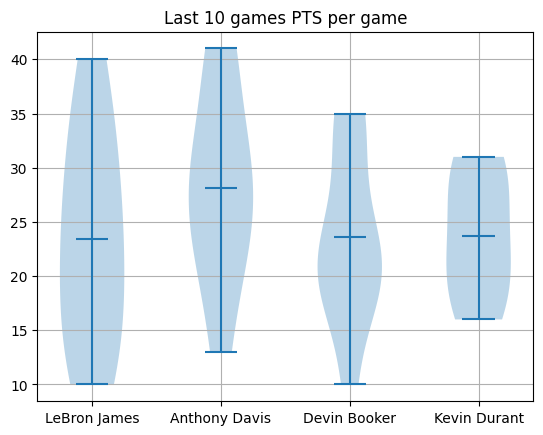

In [21]:
def plot_player_gamelogs(player_names, n_games, term='PTS' ,season='2023-24'):
    fig, ax = plt.subplots()
    player_ids = [players.find_players_by_full_name(player_name)[0]['id'] for player_name in player_names]
    players_pts = []
    for player_id in player_ids:
        df = playergamelogs.PlayerGameLogs(
            player_id_nullable=player_id,
            last_n_games_nullable=n_games,
            season_nullable=season
            ).get_data_frames()[0]
        players_pts.append(df[term])

    ax.violinplot(players_pts,showmeans=True)
    ax.set_xticks(np.arange(1, len(player_names)+1), labels=player_names)
    plt.title(f'Last {n_games} games {term} per game')
    plt.grid(True)
    plt.show()

plot_player_gamelogs(["LeBron James", "Anthony Davis" ,"Devin Booker","Kevin Durant"],10,'PTS')